In [16]:
%matplotlib inline
import nsfg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import thinkplot
import thinkstats2
from math import sqrt

In [3]:
df = nsfg.ReadFemPreg()
df.describe()

nsfg.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f152250>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12b0f35d0>], dtype=object)

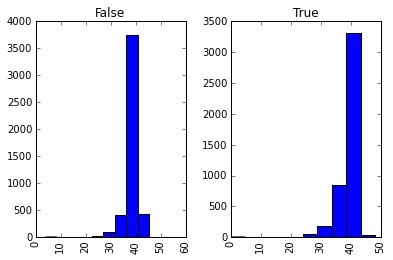

In [30]:
live = df[df.outcome == 1]
df[df.outcome==1].prglngth.hist(by=(df.birthord == 1))

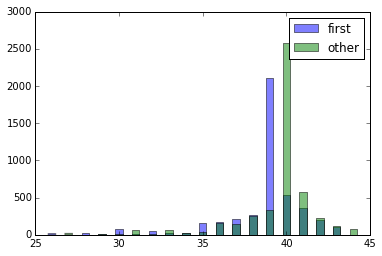

In [60]:
bins = xrange(26,45)
plt.hist(live[live.birthord == 1].prglngth.values, bins, alpha=0.5, label='first', align='left', rwidth=0.45)
plt.hist(live[live.birthord != 1].prglngth.values, bins, alpha=0.5, label='other', align='right', rwidth=0.45)
plt.legend(loc='upper right')
plt.show()

In [41]:
df[df.outcome != 1].prglngth.values

array([9, 3, 5, ..., 9, 6, 5])

In [65]:
first_hist = thinkstats2.Hist(live[live.birthord == 1].prglngth)
other_hist = thinkstats2.Hist(live[live.birthord != 1].prglngth)
print live[live.birthord == 1].prglngth.value_counts(), first_hist

2114 Hist({0: 1, 17: 1, 20: 1, 21: 1, 22: 3, 23: 1, 24: 7, 25: 1, 26: 16, 27: 1, 28: 24, 29: 9, 30: 73, 31: 15, 32: 55, 33: 28, 34: 29, 35: 159, 36: 172, 37: 208, 38: 272, 39: 2114, 40: 536, 41: 360, 42: 205, 43: 87, 44: 23, 45: 6, 46: 1, 47: 1, 48: 3})


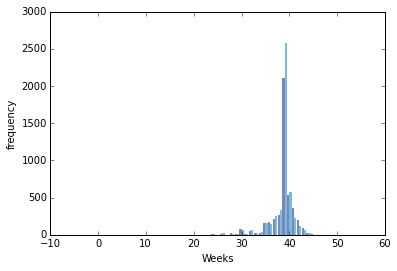

In [67]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='Weeks', ylabel='frequency', bins=xrange(26,45))

In [74]:
first = live[live.birthord == 1]
other = live[live.birthord != 1]
print live.prglngth.mean(), live.prglngth.var(), live.prglngth.std()
print first.prglngth.mean(), first.prglngth.var(), first.prglngth.std()
print other.prglngth.mean(), other.prglngth.var(), other.prglngth.std()

38.5605596852 7.30266206783 2.70234381007
38.6009517335 7.79471350923 2.79190141467
38.5229144667 6.8426835193 2.61585235044


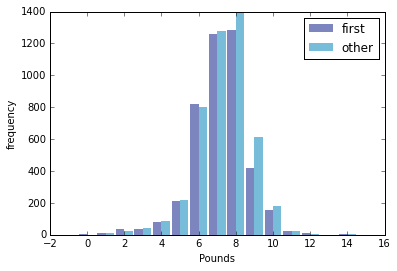

7.20109443044 7.32585561497
1.42057287772 1.39419547621


In [84]:
first_hist = thinkstats2.Hist(first.totalwgt_lb.round(), label='first')
other_hist = thinkstats2.Hist(other.totalwgt_lb.round(), label='other')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='Pounds', ylabel='frequency')
print first.totalwgt_lb.mean(), other.totalwgt_lb.mean()
print first.totalwgt_lb.std(), other.totalwgt_lb.std()

In [86]:
def cohen_d(group1, group2):
    diff = group1.mean() - group2.mean()
    
    n1, n2 = len(group1), len(group2)
    var1, var2 = group1.var(), group2.var()
    numerator = n1 * var1 + n2 * var2
    denominator = n1 + n2
    pooled_std = sqrt(numerator / denominator)
    
    d = diff / pooled_std
    return d

In [89]:
cohen_d(other.prglngth, first.prglngth)

-0.028879044654449883

In [4]:
df.describe()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
count,13593.000000,13593.000000,352.000000,349.00000,352.000000,3.000000,13241.000000,18.000000,9144.000000,163.000000,...,13593.000000,13593.000000,13593,13593.000000,13593.000000,13593.000000,13593.000000,13593.000000,0,9038.000000
mean,6216.526595,2.349150,15.144886,1.34384,4.647727,3.666667,4.650177,4.055556,1.022419,1.834356,...,0.000809,0.003016,0,4216.271164,5383.982581,8196.422280,1.487310,44.083352,NaN,7.265628
std,3645.417341,1.577807,13.922211,0.47567,2.527523,4.618802,1.849790,1.696787,0.190098,1.630208,...,0.028437,0.058727,0,3982.680473,5640.499431,9325.918114,0.499857,24.110403,NaN,1.408293
min,1.000000,1.000000,0.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0,64.577101,71.201194,118.656790,1.000000,1.000000,NaN,0.125000
25%,3022.000000,1.000000,5.000000,1.00000,2.000000,1.000000,3.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0,2335.445237,2798.048902,3841.375308,1.000000,25.000000,NaN,6.500000
50%,6161.000000,2.000000,9.000000,1.00000,5.000000,1.000000,6.000000,4.000000,1.000000,1.000000,...,0.000000,0.000000,0,3409.648504,4127.220642,6256.592133,1.000000,45.000000,NaN,7.375000
75%,9423.000000,3.000000,23.000000,2.00000,7.000000,5.000000,6.000000,6.000000,1.000000,1.000000,...,0.000000,0.000000,0,4869.941451,5795.692880,9432.360931,2.000000,65.000000,NaN,8.125000
max,12571.000000,19.000000,99.000000,2.00000,9.000000,9.000000,9.000000,6.000000,5.000000,5.000000,...,1.000000,2.000000,0,99707.832014,157143.686687,261879.953864,2.000000,84.000000,NaN,15.437500


In [8]:
df2 = df.dropna(subset=['agepreg', 'totalwgt_lb'])
ages, weights = df.agepreg, df.totalwgt_lb

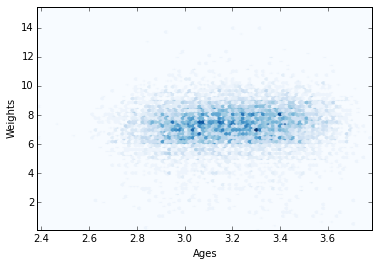

In [17]:
thinkplot.HexBin(np.log(ages), weights)
thinkplot.Show(xlabel='Ages', ylabel='Weights')

In [19]:
thinkstats2.Corr(np.log(ages),weights)

0.074160236559443246

In [18]:
thinkstats2.SpearmanCorr(np.log(ages),weights)

0.094610041096582262